### Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Для работы с отзывами о товарах на русском языке используем Датасет отзывов об организациях от Яндекс Карт

	•	Описание: В сентябре 2023 года Яндекс Карты опубликовали крупнейший русскоязычный датасет отзывов об организациях. Он содержит 500 000 отзывов, собранных по всей России в период с января по июль 2023 года. Каждый отзыв включает текст, оценку пользователя, название и адрес организации, а также список рубрик (например, кафе, ресторан). ￼
	•	Содержимое:
	•	Тексты отзывов
	•	Оценки пользователей
	•	Названия и адреса организаций
	•	Рубрики организаций
	•	Задачи, которые можно решать с помощью этого датасета:
	•	Анализ тональности отзывов
	•	Классификация отзывов по рубрикам
	•	Распознавание именованных сущностей (например, названий организаций)
	•	Обучение моделей для рекомендаций
	•	Источник и загрузка: Датасет доступен для скачивания на Хабре.

In [7]:
# Чтение файла и обработка строк TSKV
data = []
with open("geo-reviews-dataset-2023.tskv", "r", encoding="utf-8") as file:
    for line in file:
        row = dict(item.split("=", 1) for item in line.strip().split("\t"))
        data.append(row)

# Пример: вывод первых строк
print(data[:5])

[{'address': 'Екатеринбург, ул. Московская / ул. Волгоградская / ул. Печатников', 'name_ru': 'Московский квартал', 'rating': '3.', 'rubrics': 'Жилой комплекс', 'text': 'Московский квартал 2.\\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3.'}, {'address': 'Московская область, Электросталь, проспект Ленина, 29', 'name_ru': 'Продукты Ермолино', 'rating': '5.', 'rubrics': 'Магазин продуктов;Продукты глубокой заморозки;Магазин мяса, колбас', 'text': 'Замечательная сеть магазинов в общем, хороший ассортимент, цены приемлемые, а глав

In [8]:
import pandas as pd

# Преобразование списка словарей в DataFrame
df = pd.DataFrame(data)

# Вывод первых строк
print(df.head())

                                             address             name_ru  \
0  Екатеринбург, ул. Московская / ул. Волгоградск...  Московский квартал   
1  Московская область, Электросталь, проспект Лен...   Продукты Ермолино   
2  Краснодар, Прикубанский внутригородской округ,...             LimeFit   
3   Санкт-Петербург, проспект Энгельса, 111, корп. 1        Snow-Express   
4                  Тверь, Волоколамский проспект, 39  Студия Beauty Brow   

  rating                                            rubrics  \
0     3.                                     Жилой комплекс   
1     5.  Магазин продуктов;Продукты глубокой заморозки;...   
2     1.                                        Фитнес-клуб   
3     4.        Пункт проката;Прокат велосипедов;Сапсёрфинг   
4     5.  Салон красоты;Визажисты, стилисты;Салон бровей...   

                                                text  
0  Московский квартал 2.\nШумно : летом по ночам ...  
1  Замечательная сеть магазинов в общем, хороший ...  

### Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Разметка на основе правил (Rule-Based Labeling)

Для выполнения разметки на основе правил используем подмножество датасета отзывов. Основная цель — автоматически присвоить метки данным на основе простых шаблонов и условий.

Пример задачи: Анализ настроений
Цель: Разметить отзывы на положительные, отрицательные и нейтральные на основе ключевых слов и шаблонов.



In [16]:
# Выбираем только текст и рейтинг
subset_rule_based = df[['text', 'rating']].sample(frac=0.01)


Разработка правил

Используем ключевые слова и фразы для определения настроения:

-	Положительные отзывы: содержат слова вроде “хорошо”, “отлично”, “прекрасно”, “советую”, “понравилось”.
-	Отрицательные отзывы: содержат слова вроде “плохо”, “ужасно”, “не советую”, “разочарование”, “никогда”.
-	Нейтральные отзывы: не содержат явных признаков положительного или отрицательного настроения.

sentiment
positive    4359
negative     526
neutral      115
Name: count, dtype: int64


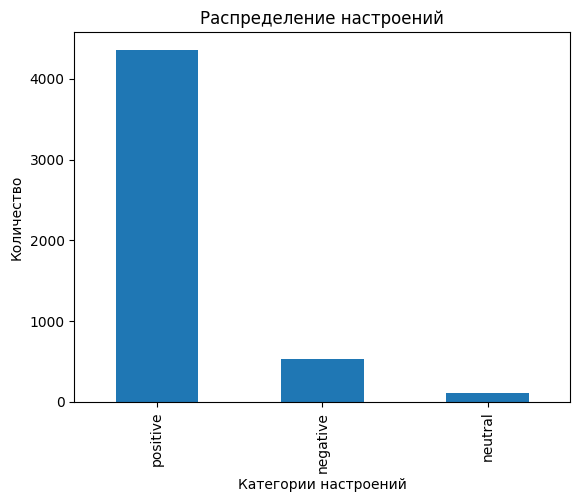

In [19]:
import re

# словарь ключевых слов
positive_keywords = ["хорошо", "отлично", "прекрасно", "советую", "понравилось", "вкусно", "замечательно",
                     "качественно", "приятно", "рекомендую"]
negative_keywords = ["плохо", "ужасно", "не советую", "разочарование", "никогда", "отвратительно", "грубый", "ужас",
                     "разочарован", "медленно"]


def label_sentiment(row):
    text_lower = row['text'].lower()
    rating = row['rating']

    # Учет отрицания
    for word in positive_keywords:
        if re.search(rf'\bне {word}\b', text_lower):  # "не понравилось"
            return "negative"

    for word in negative_keywords:
        if re.search(rf'\bне {word}\b', text_lower):  # "не ужасно"
            return "positive"

    # Простые ключевые слова
    if any(word in text_lower for word in positive_keywords):
        return "positive"
    elif any(word in text_lower for word in negative_keywords):
        return "negative"

    # Учет рейтинга (если есть)
    if rating is not None:
        if float(rating) >= 4:
            return "positive"
        elif float(rating) <= 2:
            return "negative"

    return "neutral"


# Применение функции к текстам и сохраняем в файл .csv
subset_rule_based['sentiment'] = subset_rule_based.apply(label_sentiment, axis=1)
subset_rule_based.to_csv('subset_rule_based.csv', index=False)

# Анализ результатов
print(subset_rule_based['sentiment'].value_counts())

# Визуализация
import matplotlib.pyplot as plt

subset_rule_based['sentiment'].value_counts().plot(kind='bar')
plt.title("Распределение настроений")
plt.xlabel("Категории настроений")
plt.ylabel("Количество")
plt.show()

### Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [14]:
# Формируем выборку для ручной разметки и сохраняем ее в файл .csv
subset_manual = df[['text', 'rating']].sample(frac=0.01)

# subset_manual['sentiment'] = subset_manual.apply(label_sentiment, axis=1)
subset_manual.to_csv('subset_manual.csv', index=False)

Label Studio

	•	Описание: Бесплатный и мощный инструмент для разметки данных, включая тексты, изображения и видео. Поддерживает кастомные метки.
	•	Преимущества:
	•	Полностью бесплатный.
	•	Удобный веб-интерфейс.
	•	Простая настройка для текстовых данных.
	•	Подходит для: Разметки настроений, классификации, выделения именованных сущностей.
	•	Сайт: Label Studio

Как начать с Label Studio

	1.	Установите инструмент:

`pip install label-studio`


	2.	Запустите сервер:

`label-studio start`


	3.	Откройте веб-интерфейс (обычно по адресу http://localhost:8080).
	4.	Загрузите данные для разметки в формате JSON или CSV.
	5.	Настройте метки и начните разметку.

### Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [20]:

# Загрузка размеченных вручную данных
subset_manual = pd.read_csv("subset_manual.csv", encoding='utf-8', engine='python', on_bad_lines='skip')

# Загрузка данных, размеченных на основе правил
subset_rule_based = pd.read_csv("subset_rule_based.csv")

# Объединение данных
combined_data = pd.concat([subset_rule_based, subset_manual], ignore_index=True)

combined_data

,text,rating,sentiment
0,"Очень вкусные суши, рёбрышки бесподобные, беза...",5.0,negative
1,"Шикарный магазин, потеряли его , он раньше был...",5.0,negative
2,"Много колонок, есть 100-й. Всегда чисто, больш...",5.0,positive
3,Если хотите потрепать нервы вам сюда! Перед нг...,1.0,negative
4,Отличный отель!\nМы взяли номер с подругой в а...,5.0,positive
...,...,...,...
9995,Красочный канатный городок с кучей интересных ...,5.0,positive
9996,Проходила марафон практики Кали медитация у М...,5.0,positive
9997,Здесь работают профессионалы своего дела! Стар...,5.0,positive
9998,Были 17.07.2023-ужас просто ужас. Оплата не ма...,1.0,negative


### Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [22]:
# Разделение данных
X = combined_data['text']  # Тексты отзывов
y = combined_data['sentiment']  # Метки настроений

# Разделение на обучающий и тестовый наборы (например, 80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Для работы моделей машинного обучения необходимо преобразовать тексты в векторы. Используем TfidfVectorizer.
# Преобразование текстов с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Учитываем униграммы и биграммы
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
# Обучение модели Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

### Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [26]:
# Прогнозирование на тестовых данных
y_pred = model.predict(X_test_tfidf)

# Оценка качества
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.891

Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.23      0.36       213
     neutral       0.00      0.00      0.00        47
    positive       0.89      1.00      0.94      1740

    accuracy                           0.89      2000
   macro avg       0.59      0.41      0.43      2000
weighted avg       0.87      0.89      0.86      2000

